In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("/content/drive/MyDrive/project/Emp_attrition_csv.csv")

In [3]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74605,13450,44,Female,20,Healthcare,7578,Fair,Medium,Low,2,...,3,Mid,Large,52.0,No,No,No,Fair,Very High,Left
74606,2386,45,Male,26,Technology,8342,Excellent,Very High,Below Average,3,...,4,Mid,Medium,NaN,Yes,No,No,Poor,High,Stayed
74607,36968,28,Female,3,Technology,9763,Poor,Low,Average,0,...,3,Senior,Small,67.0,No,No,No,Poor,Medium,Left
74608,24276,37,Male,3,Education,3644,Fair,High,Average,2,...,4,Entry,Medium,16.0,No,No,No,Excellent,Medium,Stayed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

In [5]:
df.isna().sum()*100/len(df)

,0
Employee ID,0.000000
Age,0.000000
Gender,0.000000
Years at Company,0.000000
Job Role,0.000000
Monthly Income,0.000000
Work-Life Balance,0.000000
Job Satisfaction,0.000000
Performance Rating,0.000000
Number of Promotions,0.000000


In [6]:
df['Distance from Home']=df['Distance from Home'].fillna(df['Distance from Home'].mean())
df['Company Tenure (In Months)']=df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].mean())

# VISUALIZATION

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Set style
# sns.set(style="whitegrid")
# plt.rcParams["figure.figsize"] = (10, 6)

<ipython-input-42-618425a57fee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="Set2")


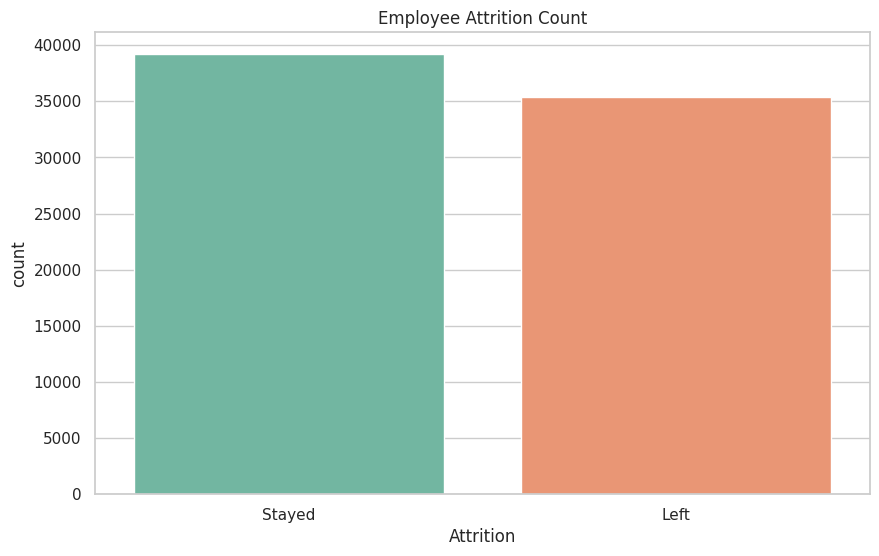

In [ ]:
# 1. Attrition Count Plot
plt.figure()
sns.countplot(x="Attrition", data=df, palette="Set2")
plt.title("Employee Attrition Count")
plt.show()

<ipython-input-47-15ef56d13aeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.values, y=avg_income.index, palette="coolwarm")


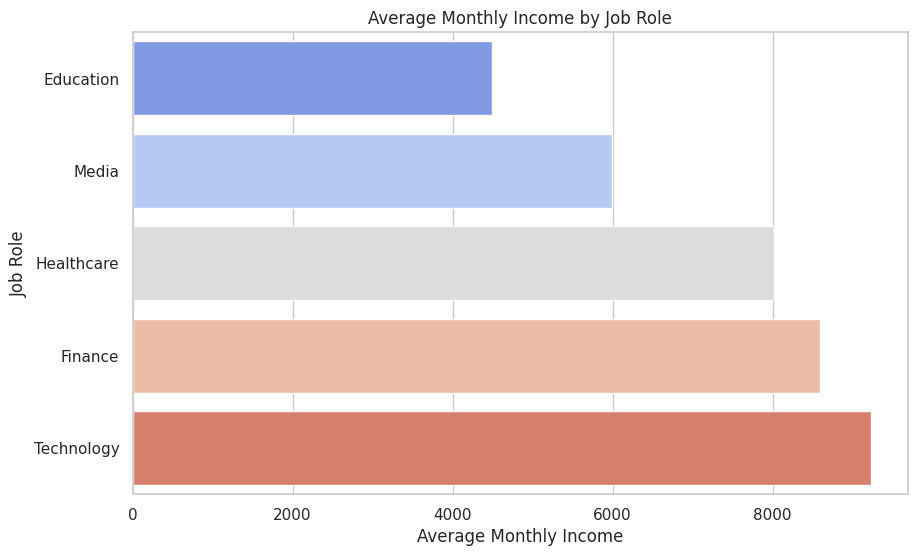

In [ ]:
# 2. Monthly Income by Job Role
plt.figure()
avg_income = df.groupby("Job Role")["Monthly Income"].mean().sort_values()
sns.barplot(x=avg_income.values, y=avg_income.index, palette="coolwarm")
plt.xlabel("Average Monthly Income")
plt.title("Average Monthly Income by Job Role")
plt.show()


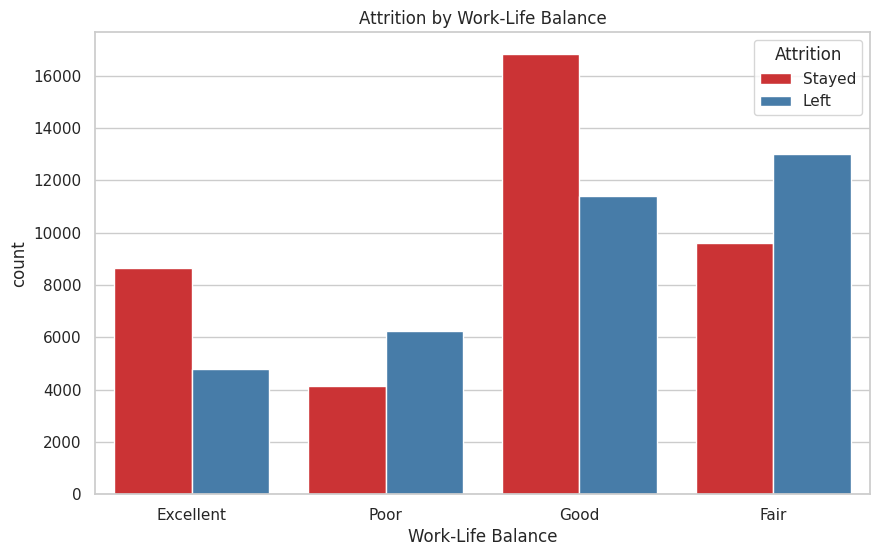

In [ ]:
# 3. Attrition Rate by Work-Life Balance
plt.figure()
sns.countplot(x="Work-Life Balance", hue="Attrition", data=df, palette="Set1")
plt.title("Attrition by Work-Life Balance")
plt.show()

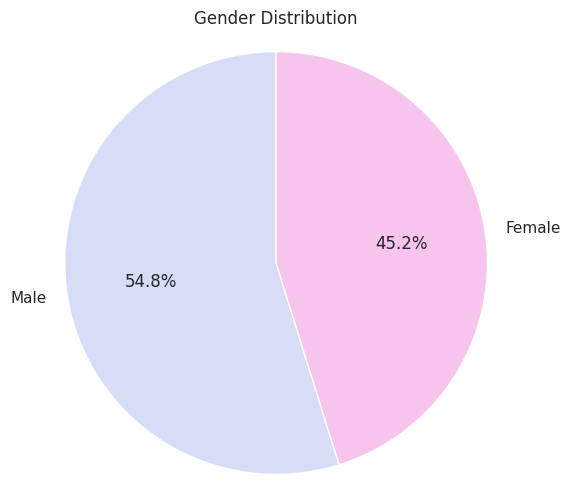

In [ ]:
# 4. gender value count


# Plot pie chart
plt.figure(figsize=(6, 6))
gender_counts = df["Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90, colors=["#d8ddf7", "#f6c4ec"])
plt.title("Gender Distribution")
plt.axis("equal")  # Equal aspect ratio to ensure the pie is round
plt.show()


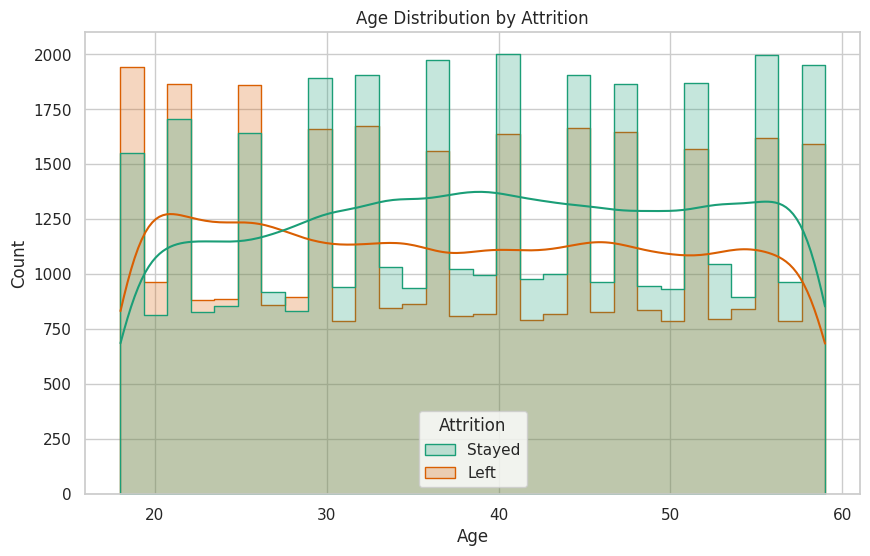

In [ ]:
num=df.select_dtypes(include=['int64','float64']).columns

corr=df[num].corr()
print(corr)

                            Employee ID       Age  Years at Company  \
Employee ID                    1.000000  0.003432          0.000382   
Age                            0.003432  1.000000          0.537334   
Years at Company               0.000382  0.537334          1.000000   
Monthly Income                 0.001367 -0.004469         -0.008797   
Number of Promotions           0.006339  0.000489          0.000871   
Distance from Home             0.008122 -0.004790         -0.004967   
Number of Dependents          -0.004675  0.004121          0.005120   
Company Tenure (In Months)    -0.002775  0.232524          0.435153   

                            Monthly Income  Number of Promotions  \
Employee ID                       0.001367              0.006339   
Age                              -0.004469              0.000489   
Years at Company                 -0.008797              0.000871   
Monthly Income                    1.000000              0.001497   
Number of Promotions

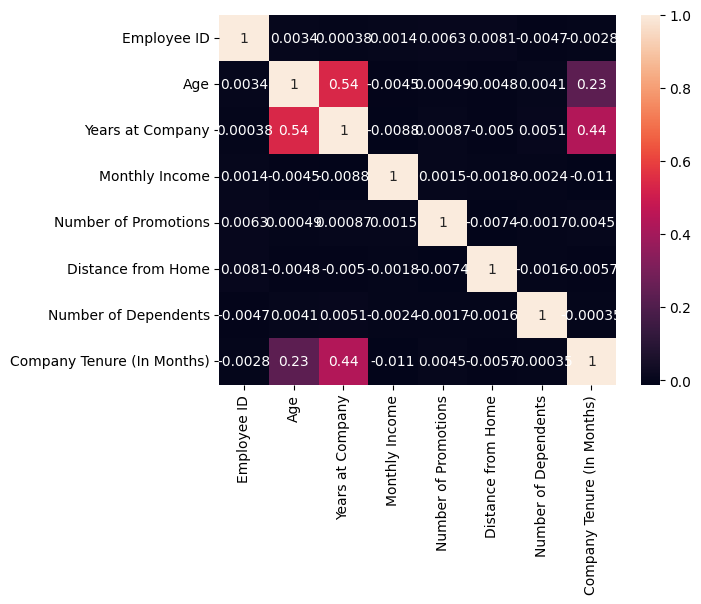

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(5,8))
sns.heatmap(corr,annot=True)
plt.show()

In [8]:
df.drop(columns=['Employee ID'], inplace=True)


In [9]:
df.shape

(74610, 23)

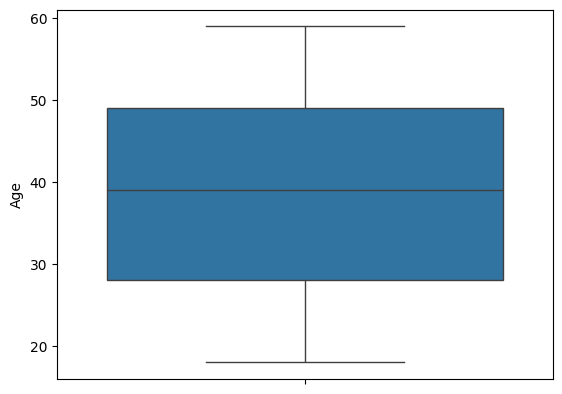

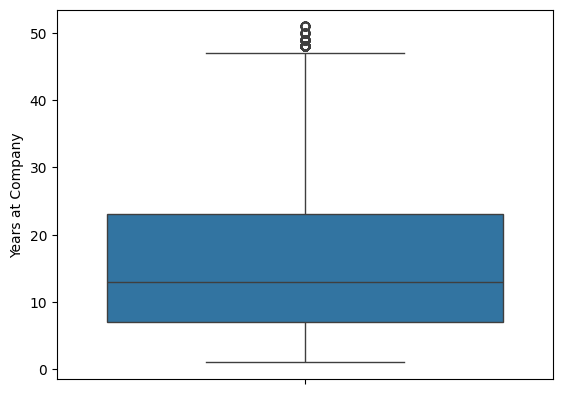

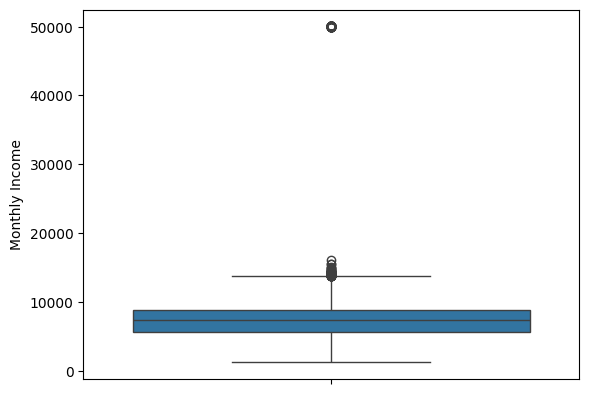

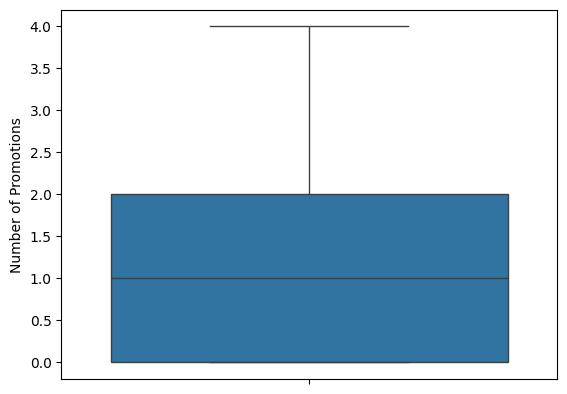

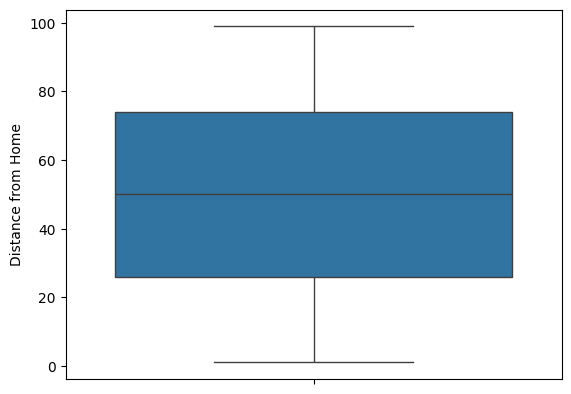

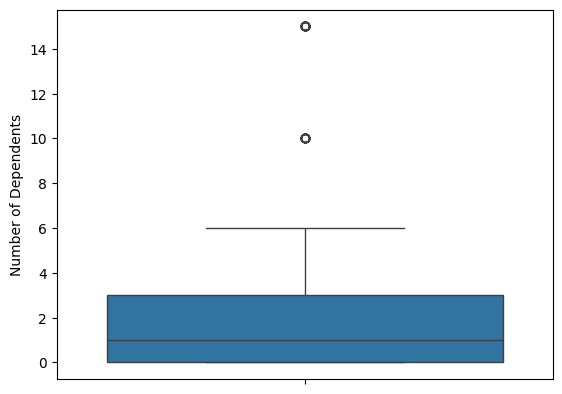

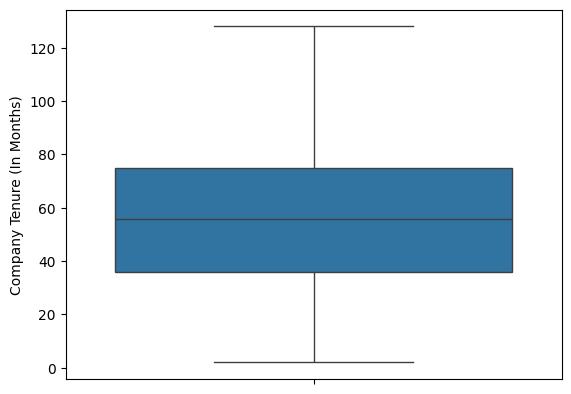

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

num = df.select_dtypes(include=['int64', 'float64']).columns

for i in num:
  sns.boxplot(df[i])
  plt.show()

In [11]:
columns = ["Years at Company", "Number of Dependents"]

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(len(df),"\n","Lower bound:",lower_bound,"\n","Upper bound:",upper_bound)

print("Outliers removed!")

74272 
 Lower bound: -17.0 
 Upper bound: 47.0
74225 
 Lower bound: -4.5 
 Upper bound: 7.5
Outliers removed!


In [12]:
df.shape

(74225, 23)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Create a copy of the dataset for correlation analysis
# df_corr = df.copy()

# # Encode all categorical columns (including target 'Attrition') using LabelEncoder
# le = LabelEncoder()
# for col in df_corr.columns:
#     if df_corr[col].dtype == 'object':
#         df_corr[col] = le.fit_transform(df_corr[col])

# # Compute correlation with the target column "Attrition"
# correlations = df_corr.corr()['Attrition'].sort_values(key=abs, ascending=False)

# # Show correlations sorted by strength
# correlations


,Attrition
Attrition,1.000000
Job Level,0.315104
Marital Status,-0.228978
Remote Work,0.221106
Gender,0.100915
Distance from Home,-0.094110
Number of Promotions,0.081265
Number of Dependents,0.074423
Years at Company,0.065224
Work-Life Balance,-0.063429


In [13]:
# df.drop(columns=['Employee ID','Number of Dependents'], inplace=True)

cols_to_drop = [
    'Company Reputation', 'Performance Rating', 'Company Tenure (In Months)',
    'Company Size', 'Innovation Opportunities', 'Leadership Opportunities',
    'Job Role', 'Monthly Income', 'Employee Recognition'
]

df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Work-Life Balance', 'Job Satisfaction', 'Overtime',
       'Education Level', 'Marital Status', 'Job Level', 'Remote Work',
       'Attrition'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i,df[i].unique())

Age [31 59 24 36 56 38 47 48 57 30 29 40 19 33 49 51 39 54 23 45 42 53 37 34
 25 41 55 21 28 26 52 50 27 58 35 46 44 20 18 22 32 43]
Gender ['Male' 'Female']
Years at Company [19  4 10  7 41  3 23 16 44  1 12  6 38 22 30  9 37 33 13  5 21 32 34 11
  2 18 27 17 36  8 28 35 14 24 40 15 39 20 43 29 46 26 42 25 31 45 47]
Work-Life Balance ['Excellent' 'Poor' 'Good' 'Fair']
Job Satisfaction ['Medium' 'High' 'Very High' 'Low']
Number of Promotions [2 3 0 1 4]
Overtime ['No' 'Yes']
Distance from Home [22.         21.         11.         27.         71.         37.
 75.          5.         39.         57.         51.         26.
 78.         30.         98.         48.         17.         86.
 60.         10.         18.         49.99083881 92.         55.
 73.         38.         69.         53.          7.          6.
 50.         94.         54.          9.         87.         13.
 65.         82.         15.         41.         44.         29.
 14.         32.         12.         43.      

In [14]:
df['Education Level'].unique()

array(['Associate Degree', 'Masterâ€™s Degree', 'Bachelorâ€™s Degree',
       'High School', 'PhD'], dtype=object)

In [15]:
df['Education Level'].replace({"Masterâ€™s Degree":"Masters Degree","Bachelorâ€™s Degree":"Bachelors Degree"},inplace=True)

<ipython-input-15-d7caf56c1f8a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education Level'].replace({"Masterâ€™s Degree":"Masters Degree","Bachelorâ€™s Degree":"Bachelors Degree"},inplace=True)


In [16]:
df['Education Level'].unique()

array(['Associate Degree', 'Masters Degree', 'Bachelors Degree',
       'High School', 'PhD'], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74225 entries, 0 to 74609
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   74225 non-null  int64  
 1   Gender                74225 non-null  object 
 2   Years at Company      74225 non-null  int64  
 3   Work-Life Balance     74225 non-null  object 
 4   Job Satisfaction      74225 non-null  object 
 5   Number of Promotions  74225 non-null  int64  
 6   Overtime              74225 non-null  object 
 7   Distance from Home    74225 non-null  float64
 8   Education Level       74225 non-null  object 
 9   Marital Status        74225 non-null  object 
 10  Number of Dependents  74225 non-null  int64  
 11  Job Level             74225 non-null  object 
 12  Remote Work           74225 non-null  object 
 13  Attrition             74225 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 8.5+ MB


In [18]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le_at=LabelEncoder()
le_at.fit(df['Attrition'])
df['Attrition']=le_at.transform(df['Attrition'])    #target

le_g=LabelEncoder()
le_g.fit(df['Gender'])
df['Gender']=le_g.transform(df['Gender'])

le_w=LabelEncoder()
le_w.fit(df['Work-Life Balance'])
df['Work-Life Balance']=le_w.transform(df['Work-Life Balance'])

le_j=LabelEncoder()
le_j.fit(df['Job Satisfaction'])
df['Job Satisfaction']=le_j.transform(df['Job Satisfaction'])

le_jr=LabelEncoder()
le_jr.fit(df['Marital Status'])
df['Marital Status']=le_jr.transform(df['Marital Status'])

le_o=LabelEncoder()
le_o.fit(df['Overtime'])
df['Overtime']=le_o.transform(df['Overtime'])

le_e=LabelEncoder()
le_e.fit(df['Education Level'])
df['Education Level']=le_e.transform(df['Education Level'])

le_le=LabelEncoder()
le_le.fit(df['Job Level'])
df['Job Level']=le_le.transform(df['Job Level'])

# le_s=LabelEncoder()
# le_s.fit(df['Company Size'])
# df['Company Size']=le_s.transform(df['Company Size'])

le_m=LabelEncoder()
le_m.fit(df['Remote Work'])
df['Remote Work']=le_m.transform(df['Remote Work'])

# le_d=LabelEncoder()
# le_d.fit(df['Leadership Opportunities'])
# df['Leadership Opportunities']=le_d.transform(df['Leadership Opportunities'])

# le_i=LabelEncoder()
# le_i.fit(df['Innovation Opportunities'])
# df['Innovation Opportunities']=le_i.transform(df['Innovation Opportunities'])

# le_c=LabelEncoder()
# le_c.fit(df['Company Reputation'])
# df['Company Reputation']=le_c.transform(df['Company Reputation'])

# le_r=LabelEncoder()
# le_r.fit(df['Employee Recognition'])
# df['Employee Recognition']=le_r.transform(df['Employee Recognition'])

In [ ]:
# # one hot encoding

# from sklearn.preprocessing import OneHotEncoder

# ohe_1=OneHotEncoder(sparse_output=False)
# ohe_1.fit(df[['Marital Status']])
# abc=ohe_1.transform(df[['Marital Status']])
# df_a=pd.DataFrame(abc,columns=ohe_1.get_feature_names_out(['Marital Status']))


# # job role
# ohe_2=OneHotEncoder(sparse_output=False)
# ohe_2.fit(df[['Job Role']])
# abcd=ohe_2.transform(df[['Job Role']])
# df_b=pd.DataFrame(abcd,columns=ohe_2.get_feature_names_out(['Job Role']))

In [ ]:
# df=df.reset_index(drop=True)
# df_a=df_a.reset_index(drop=True)
# df_b=df_b.reset_index(drop=True)


# new_df=pd.concat([df,df_a,df_b],axis=1)

# new_df.drop(['Marital Status','Job Role'],axis=1, inplace=True)

# df=new_df

In [19]:
# Split data into features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [20]:
# Train-test split (80-20)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)


In [22]:
ytrain.value_counts()

,count
Attrition,
1,31166
0,28214


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
xres, yres = smote.fit_resample(xtrain, ytrain)

In [24]:
yres.value_counts()

,count
Attrition,
0,31166
1,31166


# Logistic Regression

In [25]:
lr=LogisticRegression(max_iter=1000, random_state=42)

lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)

In [26]:
print("Accuracy:",accuracy_score(ypred_lr,ytest))
print(classification_report(ypred_lr,ytest))
print(confusion_matrix(ypred_lr,ytest))

print("Training score:",lr.score(xtrain,ytrain))
print("Testing score:",lr.score(xtest,ytest))

Accuracy: 0.7098012798922196
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      7011
           1       0.73      0.72      0.72      7834

    accuracy                           0.71     14845
   macro avg       0.71      0.71      0.71     14845
weighted avg       0.71      0.71      0.71     14845

[[4878 2133]
 [2175 5659]]
Training score: 0.7134220276187269
Testing score: 0.7098012798922196


In [27]:
# lr smote

lr1=LogisticRegression(max_iter=1000, random_state=42)

lr1.fit(xres,yres)
ypred_lr1=lr1.predict(xtest)

In [28]:
print("Accuracy:",accuracy_score(ypred_lr1,ytest))
print(classification_report(ypred_lr1,ytest))
print(confusion_matrix(ypred_lr1,ytest))

print("Training score:",lr1.score(xres,yres))
print("Testing score:",lr1.score(xtest,ytest))

Accuracy: 0.7123610643314248
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      7361
           1       0.71      0.74      0.72      7484

    accuracy                           0.71     14845
   macro avg       0.71      0.71      0.71     14845
weighted avg       0.71      0.71      0.71     14845

[[5072 2289]
 [1981 5503]]
Training score: 0.7206410832317269
Testing score: 0.7123610643314248


# HyP Tuning- Logistic Regression


In [29]:


from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform


scaler = StandardScaler()
x_res_scaled = scaler.fit_transform(xres)
x_test_scaled = scaler.transform(xtest)

# Set the Logistic Regression hyperparameters space for RandomizedSearchCV
param_dist = {
    'C': uniform(0.01, 100),  # Regularization strength, sampled from a uniform distribution
    'penalty': ['l2'],  # Penalty term (only 'l2' is supported in Logistic Regression)
    'solver': ['lbfgs', 'liblinear']  # Solvers to consider
}

# Instantiate Logistic Regression model
logreg = LogisticRegression()

# Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model with the training data
random_search.fit(x_res_scaled, yres)

# Best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model from RandomizedSearchCV for prediction
best_lr = random_search.best_estimator_

# Predict on the test set
ypred_best_lr = best_lr.predict(x_test_scaled)


Best Hyperparameters: {'C': np.float64(0.08787658410143283), 'penalty': 'l2', 'solver': 'liblinear'}


In [30]:
print("Accuracy:",accuracy_score(ypred_best_lr,ytest))
print(classification_report(ypred_best_lr,ytest))
print(confusion_matrix(ypred_best_lr,ytest))

print("Training score:",best_lr.score(xres,yres))
print("Testing score:",best_lr.score(xtest,ytest))

Accuracy: 0.7122937015830246
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      7362
           1       0.71      0.74      0.72      7483

    accuracy                           0.71     14845
   macro avg       0.71      0.71      0.71     14845
weighted avg       0.71      0.71      0.71     14845

[[5072 2290]
 [1981 5502]]
Training score: 0.5492363473015466
Testing score: 0.5328393398450657


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Random Forest

In [31]:
rf=RandomForestClassifier(n_estimators=100, random_state=42,)

rf.fit(xtrain,ytrain)

ypred_rf=rf.predict(xtest)

In [32]:
print("Accuracy:",accuracy_score(ypred_rf,ytest))
print(classification_report(ypred_rf,ytest))
print(confusion_matrix(ypred_rf,ytest))

print("Training score:",rf.score(xtrain,ytrain))
print("Testing score:",rf.score(xtest,ytest))

Accuracy: 0.7353317615358707
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7040
           1       0.75      0.75      0.75      7805

    accuracy                           0.74     14845
   macro avg       0.73      0.73      0.73     14845
weighted avg       0.74      0.74      0.74     14845

[[5082 1958]
 [1971 5834]]
Training score: 0.9999663186258
Testing score: 0.7353317615358707


In [33]:
# rf smote

rf1=RandomForestClassifier(n_estimators=100, random_state=42,)

rf1.fit(xres,yres)

ypred_rf1=rf1.predict(xtest)

In [34]:
print("Accuracy:",accuracy_score(ypred_rf1,ytest))
print(classification_report(ypred_rf1,ytest))
print(confusion_matrix(ypred_rf1,ytest))

print("Training score:",rf1.score(xtrain,ytrain))
print("Testing score:",rf1.score(xtest,ytest))

Accuracy: 0.7372852812394746
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      7301
           1       0.73      0.76      0.75      7544

    accuracy                           0.74     14845
   macro avg       0.74      0.74      0.74     14845
weighted avg       0.74      0.74      0.74     14845

[[5227 2074]
 [1826 5718]]
Training score: 0.9999326372515999
Testing score: 0.7372852812394746


# HyperParameter Tuning (RF)

In [35]:
# hyper parameter tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
rf_random.fit(xres, yres)

# Get the best parameters
best_params = rf_random.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(xres, yres)

# Predict on the test set
ypred_best_rf = best_rf.predict(xtest)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [36]:
print("Accuracy:",accuracy_score(ypred_best_rf,ytest))
print(classification_report(ypred_best_rf,ytest))
print(confusion_matrix(ypred_best_rf,ytest))

print("Training score:",best_rf.score(xtrain,ytrain))
print("Testing score:",best_rf.score(xtest,ytest))

Accuracy: 0.7450319973054901
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      7276
           1       0.74      0.76      0.75      7569

    accuracy                           0.75     14845
   macro avg       0.75      0.74      0.74     14845
weighted avg       0.75      0.75      0.74     14845

[[5272 2004]
 [1781 5788]]
Training score: 0.8845234085550691
Testing score: 0.7450319973054901


# knn

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

knn.fit(xtrain,ytrain)

ypred_knn=knn.predict(xtest)

In [38]:
print("Accuracy:",accuracy_score(ypred_knn,ytest))
print(classification_report(ypred_knn,ytest))
print(confusion_matrix(ypred_knn,ytest))

print("Training score:",knn.score(xtrain,ytrain))
print("Testing score:",knn.score(xtest,ytest))

Accuracy: 0.574469518356349
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      7332
           1       0.58      0.60      0.59      7513

    accuracy                           0.57     14845
   macro avg       0.57      0.57      0.57     14845
weighted avg       0.57      0.57      0.57     14845

[[4034 3298]
 [3019 4494]]
Training score: 0.7375547322330751
Testing score: 0.574469518356349


In [39]:
# knn smote

from sklearn.neighbors import KNeighborsClassifier

knn1=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

knn1.fit(xres,yres)

ypred_knn1=knn1.predict(xtest)

In [40]:
print("Accuracy:",accuracy_score(ypred_knn1,ytest))
print(classification_report(ypred_knn1,ytest))
print(confusion_matrix(ypred_knn1,ytest))

print("Training score:",knn1.score(xtrain,ytrain))
print("Testing score:",knn1.score(xtest,ytest))

Accuracy: 0.5733243516335467
              precision    recall  f1-score   support

           0       0.61      0.55      0.57      7827
           1       0.54      0.60      0.57      7018

    accuracy                           0.57     14845
   macro avg       0.57      0.57      0.57     14845
weighted avg       0.58      0.57      0.57     14845

[[4273 3554]
 [2780 4238]]
Training score: 0.7411081172111822
Testing score: 0.5733243516335467


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_decrease=0.0, ccp_alpha=0.0,)
dt.fit(xtrain,ytrain)

ypred_dt=dt.predict(xtest)

In [42]:
print("Accuracy:",accuracy_score(ypred_dt,ytest))
print(classification_report(ypred_dt,ytest))
print(confusion_matrix(ypred_dt,ytest))

print("Training score:",dt.score(xtrain,ytrain))
print("Testing score:",dt.score(xtest,ytest))

Accuracy: 0.6660828561805322
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      7012
           1       0.68      0.68      0.68      7833

    accuracy                           0.67     14845
   macro avg       0.67      0.67      0.67     14845
weighted avg       0.67      0.67      0.67     14845

[[4554 2458]
 [2499 5334]]
Training score: 0.9999831593128999
Testing score: 0.6660828561805322


In [43]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

dt1=DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, min_impurity_decrease=0.0, ccp_alpha=0.0,)
dt1.fit(xres,yres)

ypred_dt1=dt1.predict(xtest)

In [44]:
print("Accuracy:",accuracy_score(ypred_dt1,ytest))
print(classification_report(ypred_dt1,ytest))
print(confusion_matrix(ypred_dt1,ytest))

print("Training score:",dt1.score(xtrain,ytrain))
print("Testing score:",dt1.score(xtest,ytest))

Accuracy: 0.6695183563489391
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      7181
           1       0.68      0.69      0.68      7664

    accuracy                           0.67     14845
   macro avg       0.67      0.67      0.67     14845
weighted avg       0.67      0.67      0.67     14845

[[4664 2517]
 [2389 5275]]
Training score: 0.9999831593128999
Testing score: 0.6695183563489391


# XGBOOST

In [45]:
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb.fit(xtrain,ytrain)

ypred_xgb=xgb.predict(xtest)

In [46]:
print("Accuracy:",accuracy_score(ypred_xgb,ytest))
print(classification_report(ypred_xgb,ytest))
print(confusion_matrix(ypred_xgb,ytest))

print("Training score:",xgb.score(xtrain,ytrain))
print("Testing score:",xgb.score(xtest,ytest))

Accuracy: 0.7510946446615022
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      7008
           1       0.77      0.76      0.76      7837

    accuracy                           0.75     14845
   macro avg       0.75      0.75      0.75     14845
weighted avg       0.75      0.75      0.75     14845

[[5183 1825]
 [1870 5967]]
Training score: 0.754546985517009
Testing score: 0.7510946446615022


In [47]:
# xgb smote

from xgboost import XGBClassifier

xgb1=XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb1.fit(xres,yres)

ypred_xgb1=xgb1.predict(xtest)

In [48]:
print("Accuracy:",accuracy_score(ypred_xgb1,ytest))
print(classification_report(ypred_xgb1,ytest))
print(confusion_matrix(ypred_xgb1,ytest))

print("Training score:",xgb1.score(xtrain,ytrain))
print("Testing score:",xgb1.score(xtest,ytest))

Accuracy: 0.7521050858875042
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7367
           1       0.74      0.77      0.76      7478

    accuracy                           0.75     14845
   macro avg       0.75      0.75      0.75     14845
weighted avg       0.75      0.75      0.75     14845

[[5370 1997]
 [1683 5795]]
Training score: 0.7534523408555069
Testing score: 0.7521050858875042


# hyper parameter tuning - XGB

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Step 1: Define the base model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 2: Define the parameter distribution for tuning
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Step 3: Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit the search object to training data and get best estimator
random_search.fit(xtrain, ytrain)
best_xgb1 = XGBClassifier(**random_search.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb1.fit(xtrain, ytrain)

# Step 5: Predict using the best model
ypred_best_xgb1 = best_xgb1.predict(xtest)

# Optional: print best parameters
print("Best Parameters Found:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:22:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:22:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters Found: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [57]:
print("Accuracy:",accuracy_score(ypred_best_xgb1,ytest))
print(classification_report(ypred_best_xgb1,ytest))
print(confusion_matrix(ypred_best_xgb1,ytest))

print("Training score:",best_xgb1.score(xtrain,ytrain))
print("Testing score:",best_xgb1.score(xtest,ytest))

Accuracy: 0.7528460761199057
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7066
           1       0.76      0.77      0.76      7779

    accuracy                           0.75     14845
   macro avg       0.75      0.75      0.75     14845
weighted avg       0.75      0.75      0.75     14845

[[5225 1841]
 [1828 5951]]
Training score: 0.759447625463119
Testing score: 0.7528460761199057


<Figure size 1200x600 with 0 Axes>

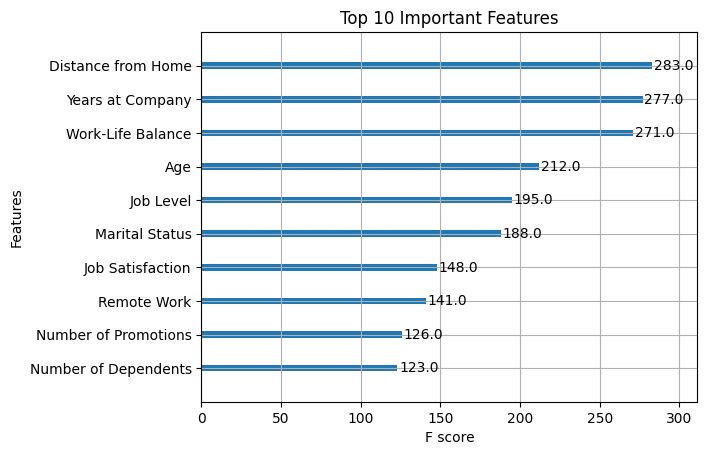

In [51]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(12, 6))
plot_importance(best_xgb, max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74225 entries, 0 to 74609
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   74225 non-null  int64  
 1   Gender                74225 non-null  int64  
 2   Years at Company      74225 non-null  int64  
 3   Work-Life Balance     74225 non-null  int64  
 4   Job Satisfaction      74225 non-null  int64  
 5   Number of Promotions  74225 non-null  int64  
 6   Overtime              74225 non-null  int64  
 7   Distance from Home    74225 non-null  float64
 8   Education Level       74225 non-null  int64  
 9   Marital Status        74225 non-null  int64  
 10  Number of Dependents  74225 non-null  int64  
 11  Job Level             74225 non-null  int64  
 12  Remote Work           74225 non-null  int64  
 13  Attrition             74225 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 8.5 MB


# Saving model

In [59]:
import pickle


pickle.dump(best_xgb1,open('model.pkl','wb')) #best model

pickle.dump(le_at,open('Attrition.pkl','wb'))
pickle.dump(le_g,open('gender.pkl','wb'))
pickle.dump(le_j,open('job_satisfaction.pkl','wb'))
pickle.dump(le_jr,open('marital_status.pkl','wb'))
pickle.dump(le_o,open('overtime.pkl','wb'))
pickle.dump(le_e,open('education_level.pkl','wb'))
pickle.dump(le_w,open('work_life_balance.pkl','wb'))
pickle.dump(le_le,open('job_level.pkl','wb'))
pickle.dump(le_m,open('remote_work.pkl','wb'))

pickle.dump(scaler,open('scaler.pkl','wb'))

In [60]:
pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.5.2
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.23
albumentations                        2.0.5
ale-py                                0.10.2
altair                                5.5.0
annotated-types                       0.7.0
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.1
arviz                                 0.21.0
astropy                               7.0.1
astropy-iers-data                     0.2025.4.14.0.37.22
astunparse                            1.6.3
atpublic                              5